# Setup cell

In [1]:
# Setup cell
import os

from dotenv import load_dotenv
import pandas as pd
import logging

import bitbucket
from git_operations import add_git_metrics
from metrics import Metrics
from platforms import Platforms
import github
import gitea_forgejo
import gitlab
import platform_analysis

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Load environment variables from .env file
load_dotenv()

# Load tokens from environment variables
GITHUB_TOKEN = os.getenv("GITHUB_TOKEN")
GITLAB_TOKEN = os.getenv("GITLAB_TOKEN")
GITEA_TOKEN = os.getenv("GITEA_TOKEN")
FORGEJO_TOKEN = os.getenv("FORGEJO_TOKEN")
BITBUCKET_TOKEN = os.getenv("BITBUCKET_TOKEN")

# Set up headers for API requests
GITHUB_HEADERS = {"Authorization": f"token {GITHUB_TOKEN}"}
GITEA_HEADERS = {"Authorization": f"token {GITEA_TOKEN}"}
FORGEJO_HEADERS = {"Authorization": f"token {FORGEJO_TOKEN}"}
GITLAB_HEADERS = {"Authorization": f"Bearer {GITLAB_TOKEN}"}
BITBUCKET_HEADERS = {"Authorization": f"Bearer {BITBUCKET_TOKEN}"}

# Initialize platform instances
github_instance = github.GitHub(GITHUB_HEADERS)
gitea_instance = gitea_forgejo.GiteaForgejo(GITEA_HEADERS)
forgejo_instance = gitea_forgejo.GiteaForgejo(FORGEJO_HEADERS)
gitlab_instance = gitlab.Gitlab(GITLAB_HEADERS)
bitbucket_instance = bitbucket.Bitbucket(BITBUCKET_HEADERS)

INFO:WDM:====== WebDriver manager ======
INFO:WDM:Get LATEST chromedriver version for google-chrome
INFO:WDM:Get LATEST chromedriver version for google-chrome
INFO:WDM:Driver [/Users/sam/.wdm/drivers/chromedriver/mac64/134.0.6998.88/chromedriver-mac-arm64/chromedriver] found in cache


# Fetching Repositories from Github

In [3]:
# Fetch a given number of pages of 100 Github repositories
data = github_instance.fetch_repositories(2)
file_name = "github_repositories_test.csv"

# Save the gathered data to a CSV file
if data:
    df = pd.DataFrame(data)
    df.to_csv(file_name, index=False)
    logger.info(f"Saved repositories to '{file_name}'.")
else:
    logger.error("No repositories were fetched.")

INFO:base_platform:Fetching page 1...
INFO:base_platform:Starting call to 'base_platform.BasePlatform.request_with_retry', this is the 1st time calling it.
INFO:__main__:Saved repositories to 'github_repositories_test.csv'.


### Cloning Github repositories and adding Git metrics to the dataframe

In [4]:
input_file = "github_repositories_test.csv"
output_file = "github_repos_with_metrics_test.csv"
# Load the csv file that contains the repositories
df = pd.read_csv(input_file)

add_git_metrics(df, Platforms.GITHUB)

# Save updated CSV
df.to_csv(output_file, index=False)
logger.info(f"Done! Updated file saved as {output_file}")

Cloning https://github.com/Michelle016/mini-project.git into /Users/sam/Documents/MA2/Memoire/Code/Memoire/temp...
Clone successful!
927219
Directory '/Users/sam/Documents/MA2/Memoire/Code/Memoire/temp' deleted.
Cloning https://github.com/NataliKon/blanchard-email.git into /Users/sam/Documents/MA2/Memoire/Code/Memoire/temp...
Clone successful!
50378
Directory '/Users/sam/Documents/MA2/Memoire/Code/Memoire/temp' deleted.
Cloning https://github.com/VictorDauph/exemple-sequelize-live.git into /Users/sam/Documents/MA2/Memoire/Code/Memoire/temp...
Clone successful!
288196
Directory '/Users/sam/Documents/MA2/Memoire/Code/Memoire/temp' deleted.
Cloning https://github.com/syedfuzailabdullah/AWS-S3-Bucket-Misconfiguration-Tool.git into /Users/sam/Documents/MA2/Memoire/Code/Memoire/temp...
Clone successful!
455003
No language distribution detected.
Directory '/Users/sam/Documents/MA2/Memoire/Code/Memoire/temp' deleted.
Cloning https://github.com/sanlunainiu/Adaptive-Hyperparameter-Optimization-f

### Adding Platform specific metrics to the dataframe

In [5]:
input_file = "github_repos_with_metrics_test.csv"
output_file = "github_repos_with_metrics_test.csv"

# Load the csv file that contains the repositories
df = pd.read_csv(input_file)

# Add chosen metric for each repository of the DataFrame
#github_instance.add_size(df)
github_instance.add_metric(df, Metrics.ISSUE)
#github_instance.add_metric(df, Platforms.GITHUB, Metrics.COMMIT)
#github_instance.add_metric(df, Platforms.GITHUB, Metrics.BRANCH)
github_instance.add_metric(df, Metrics.PULL_REQUEST)
#github_instance.add_metric(df, Platforms.GITHUB, Metrics.CONTRIBUTOR)

# Save updated CSV
df.to_csv(output_file, index=False)
logger.info(f"Done! Updated file saved as {output_file}")

INFO:base_platform:Fetching data for Michelle016/mini-project...
INFO:base_platform:Starting call to 'base_platform.BasePlatform.request_with_retry', this is the 1st time calling it.
INFO:base_platform:Fetching data for NataliKon/blanchard-email...
INFO:base_platform:Starting call to 'base_platform.BasePlatform.request_with_retry', this is the 1st time calling it.
INFO:base_platform:Fetching data for VictorDauph/exemple-sequelize-live...
INFO:base_platform:Starting call to 'base_platform.BasePlatform.request_with_retry', this is the 1st time calling it.
INFO:base_platform:Fetching data for syedfuzailabdullah/AWS-S3-Bucket-Misconfiguration-Tool...
INFO:base_platform:Starting call to 'base_platform.BasePlatform.request_with_retry', this is the 1st time calling it.
INFO:base_platform:Fetching data for sanlunainiu/Adaptive-Hyperparameter-Optimization-for-Author-Name-Disambiguation...
INFO:base_platform:Starting call to 'base_platform.BasePlatform.request_with_retry', this is the 1st time c

# Fetching Repositories from Gitea

In [4]:
# Fetch a given number of pages of 50 Gitea repositories
data = gitea_instance.fetch_repositories(3, Platforms.GITEA)
file_name = "gitea_repositories_test.csv"

# Save the gathered data to a CSV file
if data:
    df = pd.DataFrame(data)
    df.to_csv(file_name, index=False)
    logger.info(f"Saved repositories to '{file_name}'.")
else:
    logger.error("No repositories were fetched.")

INFO:base_platform:Fetching page 1...
INFO:base_platform:Starting call to 'base_platform.BasePlatform.request_with_retry', this is the 1st time calling it.
INFO:base_platform:Fetching page 2...
INFO:base_platform:Starting call to 'base_platform.BasePlatform.request_with_retry', this is the 1st time calling it.
INFO:__main__:Saved repositories to 'gitea_repositories_test.csv'.


### Cloning Gitea repositories and adding Git metrics to the dataframe

In [2]:
input_file = "gitea_repositories_test.csv"
output_file = "gitea_repos_with_metrics_test.csv"
# Load the csv file that contains the repositories
df = pd.read_csv(input_file)

add_git_metrics(df, Platforms.GITEA)

# Save updated CSV
df.to_csv(output_file, index=False)
logger.info(f"Done! Updated file saved as {output_file}")

Cloning https://gitea.com/MiKueYu/SPT-LiveFleaPriceDB.git into /Users/sam/Documents/MA2/Memoire/Code/Memoire/temp...
Clone successful!
61997952
Directory '/Users/sam/Documents/MA2/Memoire/Code/Memoire/temp' deleted.
Cloning https://gitea.com/HinohArata/vendor_xiaomi_camera.git into /Users/sam/Documents/MA2/Memoire/Code/Memoire/temp...
Clone successful!
404215455
Directory '/Users/sam/Documents/MA2/Memoire/Code/Memoire/temp' deleted.
Cloning https://gitea.com/evilSays/p.git into /Users/sam/Documents/MA2/Memoire/Code/Memoire/temp...
Error cloning repository: Cmd('git') failed due to: exit code(128)
  cmdline: git clone -v -- https://gitea.com/evilSays/p.git /Users/sam/Documents/MA2/Memoire/Code/Memoire/temp
  stderr: 'Cloning into '/Users/sam/Documents/MA2/Memoire/Code/Memoire/temp'...
fatal: could not read Username for 'https://gitea.com': Device not configured
'
0
No language distribution detected: Command '['/opt/homebrew/lib/ruby/gems/3.4.0/bin/github-linguist', '/Users/sam/Documents

### Adding Platform specific metrics to the dataframe

In [3]:
input_file = "gitea_repos_with_metrics_test.csv"
output_file = "gitea_repos_with_metrics_test.csv"

# Load the csv file that contains the repositories
df = pd.read_csv(input_file)

# Add chosen metric for each repository of the DataFrame
#gitea_instance.add_size(df, Platforms.GITEA)
gitea_instance.add_metric(df, Platforms.GITEA, Metrics.ISSUE)
#gitea_instance.add_metric(df, Platforms.GITEA, Metrics.COMMIT)
#gitea_instance.add_metric(df, Platforms.GITEA, Metrics.BRANCH)
gitea_instance.add_metric(df, Platforms.GITEA, Metrics.PULL_REQUEST)
#gitea_instance.add_contributors(df, Platforms.GITEA)

# Save updated CSV
df.to_csv(output_file, index=False)
logger.info(f"Done! Updated file saved as {output_file}")

INFO:base_platform:Fetching data for MiKueYu/SPT-LiveFleaPriceDB...
INFO:base_platform:Starting call to 'base_platform.BasePlatform.request_with_retry', this is the 1st time calling it.
INFO:base_platform:Fetching data for HinohArata/vendor_xiaomi_camera...
INFO:base_platform:Starting call to 'base_platform.BasePlatform.request_with_retry', this is the 1st time calling it.
INFO:base_platform:Fetching data for evilSays/p...
INFO:base_platform:Starting call to 'base_platform.BasePlatform.request_with_retry', this is the 1st time calling it.
ERROR:base_platform:Error fetching https://gitea.com/api/v1/repos/evilSays/p/issues?state=all&limit=1: not found (404)
ERROR:base_platform:Error fetching evilSays/p: 404
INFO:base_platform:Fetching data for leeej0626/flutter_tomate_0317...
INFO:base_platform:Starting call to 'base_platform.BasePlatform.request_with_retry', this is the 1st time calling it.
ERROR:base_platform:Error fetching https://gitea.com/api/v1/repos/leeej0626/flutter_tomate_0317/i

# Fetching Repositories from Forgejo

In [4]:
# Fetch a given number of pages of 50 Forgejo repositories
data = forgejo_instance.fetch_repositories(3, Platforms.FORGEJO)
file_name = "forgejo_repositories_test.csv"

# Save the gathered data to a CSV file
if data:
    df = pd.DataFrame(data)
    df.to_csv(file_name, index=False)
    logger.info(f"Saved repositories to '{file_name}'.")
else:
    logger.error("No repositories were fetched.")

INFO:base_platform:Fetching page 1...
INFO:base_platform:Starting call to 'base_platform.BasePlatform.request_with_retry', this is the 1st time calling it.
INFO:base_platform:Fetching page 2...
INFO:base_platform:Starting call to 'base_platform.BasePlatform.request_with_retry', this is the 1st time calling it.
INFO:__main__:Saved repositories to 'forgejo_repositories_test.csv'.


### Cloning Forgejo repositories and adding Git metrics to the dataframe

In [8]:
input_file = "forgejo_repositories_test.csv"
output_file = "forgejo_repos_with_metrics_test.csv"
# Load the csv file that contains the repositories
df = pd.read_csv(input_file)

add_git_metrics(df, Platforms.FORGEJO)

# Save updated CSV
df.to_csv(output_file, index=False)
logger.info(f"Done! Updated file saved as {output_file}")

Cloning https://codeberg.org/forgejo/forgejo.git into /Users/sam/Documents/MA2/Memoire/Code/Memoire/temp...
Clone successful!
348840672
Directory '/Users/sam/Documents/MA2/Memoire/Code/Memoire/temp' deleted.
Cloning https://codeberg.org/fiqri19102002/proprietary_vendor_xiaomi_marble.git into /Users/sam/Documents/MA2/Memoire/Code/Memoire/temp...
Clone successful!
3516855772
Directory '/Users/sam/Documents/MA2/Memoire/Code/Memoire/temp' deleted.
Cloning https://codeberg.org/pepicrft/vault.git into /Users/sam/Documents/MA2/Memoire/Code/Memoire/temp...
Clone successful!
47945
No language distribution detected.
Directory '/Users/sam/Documents/MA2/Memoire/Code/Memoire/temp' deleted.
Cloning https://codeberg.org/JonathanHelianthicusDoe/shticker_book_unwritten.git into /Users/sam/Documents/MA2/Memoire/Code/Memoire/temp...
Clone successful!
1174097
Directory '/Users/sam/Documents/MA2/Memoire/Code/Memoire/temp' deleted.
Cloning https://codeberg.org/gravel/session-listing-providers.git into /User

### Adding Platform specific metrics to the dataframe

In [9]:
input_file = "forgejo_repos_with_metrics_test.csv"
output_file = "forgejo_repos_with_metrics_test.csv"

# Load the csv file that contains the repositories
df = pd.read_csv(input_file)

# Add chosen metric for each repository of the DataFrame
#forgejo_instance.add_size(df, Platforms.FORGEJO)
forgejo_instance.add_metric(df, Platforms.FORGEJO, Metrics.ISSUE)
#forgejo_instance.add_metric(df, Platforms.FORGEJO, Metrics.COMMIT)
#forgejo_instance.add_metric(df, Platforms.FORGEJO, Metrics.BRANCH)
forgejo_instance.add_metric(df, Platforms.FORGEJO, Metrics.PULL_REQUEST)
#forgejo_instance.add_contributors(df, Platforms.FORGEJO)

# Save updated CSV
df.to_csv(output_file, index=False)
logger.info(f"Done! Updated file saved as {output_file}")

INFO:base_platform:Fetching data for forgejo/forgejo...
INFO:base_platform:Starting call to 'base_platform.BasePlatform.request_with_retry', this is the 1st time calling it.
INFO:base_platform:Fetching data for fiqri19102002/proprietary_vendor_xiaomi_marble...
INFO:base_platform:Starting call to 'base_platform.BasePlatform.request_with_retry', this is the 1st time calling it.
INFO:base_platform:Fetching data for pepicrft/vault...
INFO:base_platform:Starting call to 'base_platform.BasePlatform.request_with_retry', this is the 1st time calling it.
INFO:base_platform:Fetching data for JonathanHelianthicusDoe/shticker_book_unwritten...
INFO:base_platform:Starting call to 'base_platform.BasePlatform.request_with_retry', this is the 1st time calling it.
ERROR:base_platform:Error fetching https://codeberg.org/api/v1/repos/JonathanHelianthicusDoe/shticker_book_unwritten/issues?state=all&limit=1: not found (404)
ERROR:base_platform:Error fetching JonathanHelianthicusDoe/shticker_book_unwritten:

# Fetching Repositories from Gitlab

In [3]:
# Fetch a given number of pages of 100 Gitlab repositories
data = gitlab_instance.fetch_repositories(2)
file_name = "gitlab_repositories_test.csv"

# Save the gathered data to a CSV file
if data:
    df = pd.DataFrame(data)
    df.to_csv(file_name, index=False)
    logger.info(f"Saved repositories to '{file_name}'.")
else:
    logger.error("No repositories were fetched.")

INFO:base_platform:Fetching page 1...
INFO:base_platform:Starting call to 'base_platform.BasePlatform.request_with_retry', this is the 1st time calling it.
INFO:base_platform:Fetching page 2...
INFO:base_platform:Starting call to 'base_platform.BasePlatform.request_with_retry', this is the 1st time calling it.
INFO:base_platform:Fetching page 3...
INFO:base_platform:Starting call to 'base_platform.BasePlatform.request_with_retry', this is the 1st time calling it.
INFO:__main__:Saved repositories to 'gitlab_repositories_test.csv'.


### Cloning Gitlab repositories and adding Git metrics to the dataframe

In [4]:
input_file = "gitlab_repositories_test.csv"
output_file = "gitlab_repos_with_metrics_test.csv"
# Load the csv file that contains the repositories
df = pd.read_csv(input_file)

add_git_metrics(df, Platforms.GITLAB)

# Save updated CSV
df.to_csv(output_file, index=False)
logger.info(f"Done! Updated file saved as {output_file}")

Cloning https://gitlab.com/mschloesser/gitlab-ce.git into /Users/sam/Documents/MA2/Memoire/Code/Memoire/temp...
Clone successful!
2469122023
Directory '/Users/sam/Documents/MA2/Memoire/Code/Memoire/temp' deleted.
Cloning https://gitlab.com/fdroid/checkupdates-bot-fdroiddata.git into /Users/sam/Documents/MA2/Memoire/Code/Memoire/temp...
Clone successful!
404138233
Directory '/Users/sam/Documents/MA2/Memoire/Code/Memoire/temp' deleted.
Cloning https://gitlab.com/mr.y.burlaka/nonamegame.git into /Users/sam/Documents/MA2/Memoire/Code/Memoire/temp...
Clone successful!
56760888
Directory '/Users/sam/Documents/MA2/Memoire/Code/Memoire/temp' deleted.
Cloning https://gitlab.com/oidis/io-oidis-services.git into /Users/sam/Documents/MA2/Memoire/Code/Memoire/temp...
Clone successful!
2879978
Directory '/Users/sam/Documents/MA2/Memoire/Code/Memoire/temp' deleted.
Cloning https://gitlab.com/gitlab-qa-sandbox-group-2/e2e-test-2025-03-17-13-56-44-dc403c3edd80527e/project-for-alerts-e49eca0180abefb2.gi

### Adding Platform specific metrics to the dataframe

In [5]:
input_file = "gitlab_repos_with_metrics_test.csv"
output_file = "gitlab_repos_with_metrics_test.csv"

# Load the csv file that contains the repositories
df = pd.read_csv(input_file)

# Add chosen metric for each repository of the DataFrame
gitlab_instance.add_metric(df, Metrics.ISSUE)
#gitlab_instance.add_metric(df, Metrics.COMMIT)
#gitlab_instance.add_metric(df, Metrics.CONTRIBUTOR)
gitlab_instance.add_metric(df, Metrics.PULL_REQUEST)
#gitlab_instance.add_metric(df, Metrics.LANGUAGE)
#gitlab_instance.add_metric(df, Metrics.LICENSE)

# Save updated CSV
df.to_csv(output_file, index=False)
logger.info(f"Done! Updated file saved as {output_file}")

INFO:base_platform:Fetching data for mschloesser/gitlab-ce...
INFO:base_platform:Starting call to 'base_platform.BasePlatform.request_with_retry', this is the 1st time calling it.
INFO:base_platform:Fetching data for fdroid/checkupdates-bot-fdroiddata...
INFO:base_platform:Starting call to 'base_platform.BasePlatform.request_with_retry', this is the 1st time calling it.
INFO:base_platform:Fetching data for mr.y.burlaka/nonamegame...
INFO:base_platform:Starting call to 'base_platform.BasePlatform.request_with_retry', this is the 1st time calling it.
INFO:base_platform:Fetching data for oidis/io-oidis-services...
INFO:base_platform:Starting call to 'base_platform.BasePlatform.request_with_retry', this is the 1st time calling it.
INFO:base_platform:Fetching data for gitlab-qa-sandbox-group-2/e2e-test-2025-03-17-13-56-44-dc403c3edd80527e/project-for-alerts-e49eca0180abefb2...
INFO:base_platform:Starting call to 'base_platform.BasePlatform.request_with_retry', this is the 1st time calling i

# Fetching Repositories from Bitbucket

In [2]:
# Fetch a given number of pages of 100 Bitbucket repositories
data = bitbucket_instance.fetch_repositories(2)
file_name = "bitbucket_repositories_test.csv"

# Save the gathered data to a CSV file
if data:
    df = pd.DataFrame(data)
    df.to_csv(file_name, index=False)
    logger.info(f"Saved repositories to '{file_name}'.")
else:
    logger.error("No repositories were fetched.")

INFO:base_platform:Total of repositories fetched: 0/200...
INFO:base_platform:Starting call to 'base_platform.BasePlatform.request_with_retry', this is the 1st time calling it.
INFO:base_platform:Total of repositories fetched: 99/200...
INFO:base_platform:Starting call to 'base_platform.BasePlatform.request_with_retry', this is the 1st time calling it.
INFO:base_platform:Total of repositories fetched: 196/200...
INFO:base_platform:Starting call to 'base_platform.BasePlatform.request_with_retry', this is the 1st time calling it.
INFO:__main__:Saved repositories to 'bitbucket_repositories_test.csv'.


### Cloning Bitbucket repositories and adding Git metrics to the dataframe

In [6]:
input_file = "bitbucket_repositories_test.csv"
output_file = "bitbucket_repos_with_metrics_test.csv"
# Load the csv file that contains the repositories
df = pd.read_csv(input_file)

add_git_metrics(df, Platforms.BITBUCKET)

# Save updated CSV
df.to_csv(output_file, index=False)
logger.info(f"Done! Updated file saved as {output_file}")

Cloning https://bitbucket.org/sharkjobpl/shkaryjobappl.git into /Users/sam/Documents/MA2/Memoire/Code/Memoire/temp...
Clone successful!
24163
No language distribution detected: Command '['/opt/homebrew/lib/ruby/gems/3.4.0/bin/github-linguist', '/Users/sam/Documents/MA2/Memoire/Code/Memoire/temp', '--json']' returned non-zero exit status 1.
Error getting commit count: Command '['git', 'rev-list', '--count', 'HEAD']' returned non-zero exit status 128.
Directory '/Users/sam/Documents/MA2/Memoire/Code/Memoire/temp' deleted.
Cloning https://bitbucket.org/insights/blr.git into /Users/sam/Documents/MA2/Memoire/Code/Memoire/temp...
Clone successful!
4096541
Directory '/Users/sam/Documents/MA2/Memoire/Code/Memoire/temp' deleted.
Cloning https://bitbucket.org/esales-service/esales-ecs-service-ops.git into /Users/sam/Documents/MA2/Memoire/Code/Memoire/temp...
Clone successful!
34757
Directory '/Users/sam/Documents/MA2/Memoire/Code/Memoire/temp' deleted.
Cloning https://bitbucket.org/jackson-ai/ja

### Adding Platform specific metrics to the dataframe

In [7]:
input_file = "bitbucket_repos_with_metrics_test.csv"
output_file = "bitbucket_repos_with_metrics_test.csv"

# Load the csv file that contains the repositories
df = pd.read_csv(input_file)

# Add chosen metric for each repository of the DataFrame
bitbucket_instance.add_metric(df, Platforms.BITBUCKET, Metrics.STAR)
bitbucket_instance.add_metric(df, Platforms.BITBUCKET, Metrics.FORK)
bitbucket_instance.add_metric(df, Platforms.BITBUCKET, Metrics.PULL_REQUEST)
bitbucket_instance.add_metric(df, Platforms.BITBUCKET, Metrics.ISSUE)
#gitlab_instance.add_metric(df, Metrics.COMMIT)
#gitlab_instance.add_metric(df, Metrics.CONTRIBUTOR)
#gitlab_instance.add_metric(df, Metrics.LANGUAGE)
#gitlab_instance.add_metric(df, Metrics.LICENSE)

# Save updated CSV
df.to_csv(output_file, index=False)
logger.info(f"Done! Updated file saved as {output_file}")

INFO:base_platform:Fetching data for sharkjobpl/shkaryjobappl...
INFO:base_platform:Starting call to 'base_platform.BasePlatform.request_with_retry', this is the 1st time calling it.
INFO:base_platform:Fetching data for insights/blr...
INFO:base_platform:Starting call to 'base_platform.BasePlatform.request_with_retry', this is the 1st time calling it.
INFO:base_platform:Fetching data for esales-service/esales-ecs-service-ops...
INFO:base_platform:Starting call to 'base_platform.BasePlatform.request_with_retry', this is the 1st time calling it.
INFO:base_platform:Fetching data for jackson-ai/jackson-ai-py...
INFO:base_platform:Starting call to 'base_platform.BasePlatform.request_with_retry', this is the 1st time calling it.
INFO:base_platform:Fetching data for ubongsky1/hahahahah...
INFO:base_platform:Starting call to 'base_platform.BasePlatform.request_with_retry', this is the 1st time calling it.
INFO:base_platform:Fetching data for site-formosa/site-formosa...
INFO:base_platform:Star

# First Statistical analysis of the data

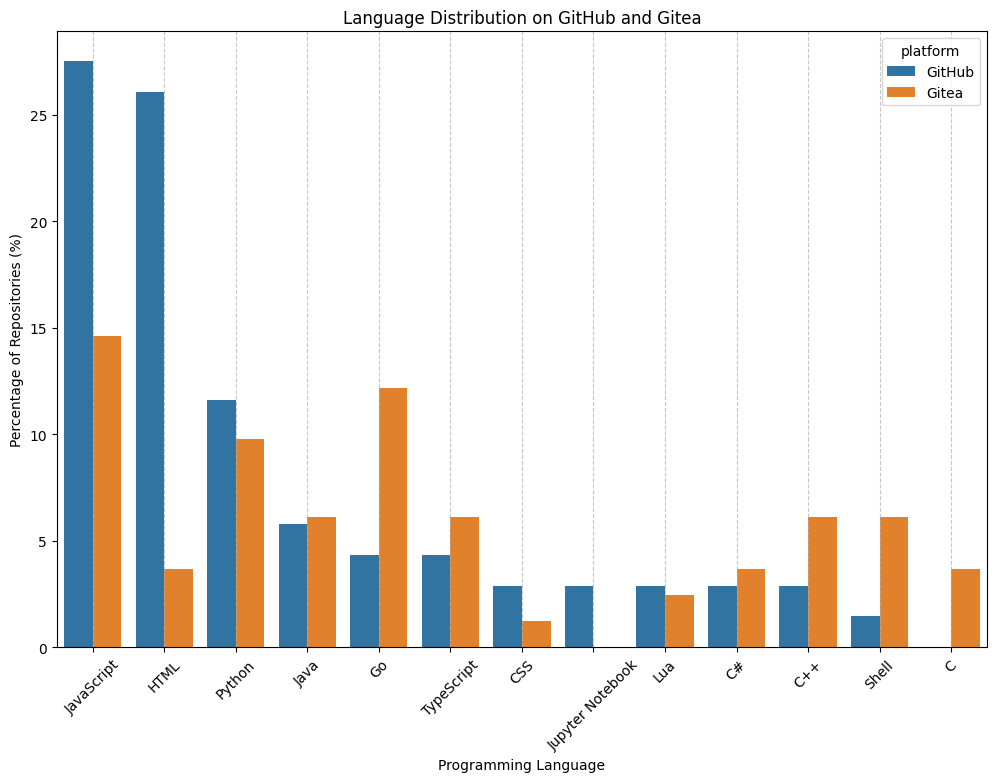

In [2]:
# Load Data
df_github = pd.read_csv("github_repos_with_metrics_test.csv")
df_gitea = pd.read_csv("gitea_repos_with_metrics_test.csv")

# Create the plot
platform_analysis.plot_language_distribution(df_github, df_gitea)


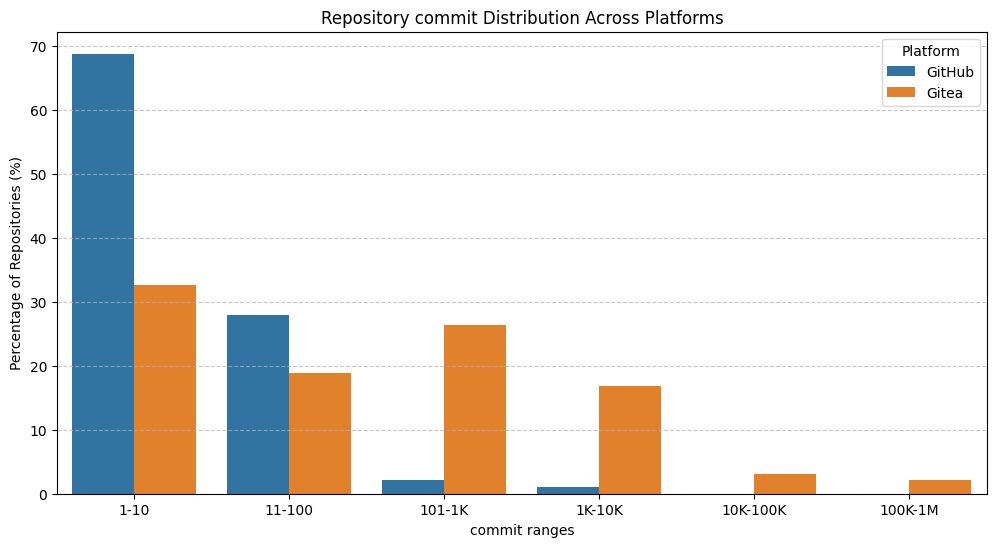

In [3]:
# Load Data
df_github = pd.read_csv("github_repos_with_metrics_test.csv")
df_gitea = pd.read_csv("gitea_repos_with_metrics_test.csv")

# Create the plot
platform_analysis.plot_distribution(df_github, df_gitea, Metrics.COMMIT)


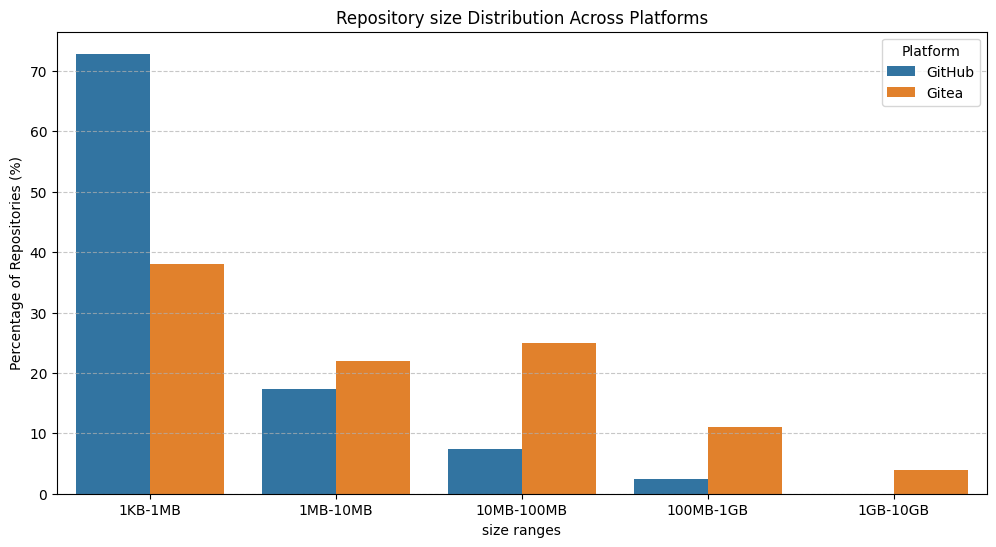

In [4]:
# Load Data
df_github = pd.read_csv("github_repos_with_metrics_test.csv")
df_gitea = pd.read_csv("gitea_repos_with_metrics_test.csv")

# Create the plot
platform_analysis.plot_distribution(df_github, df_gitea, Metrics.SIZE)

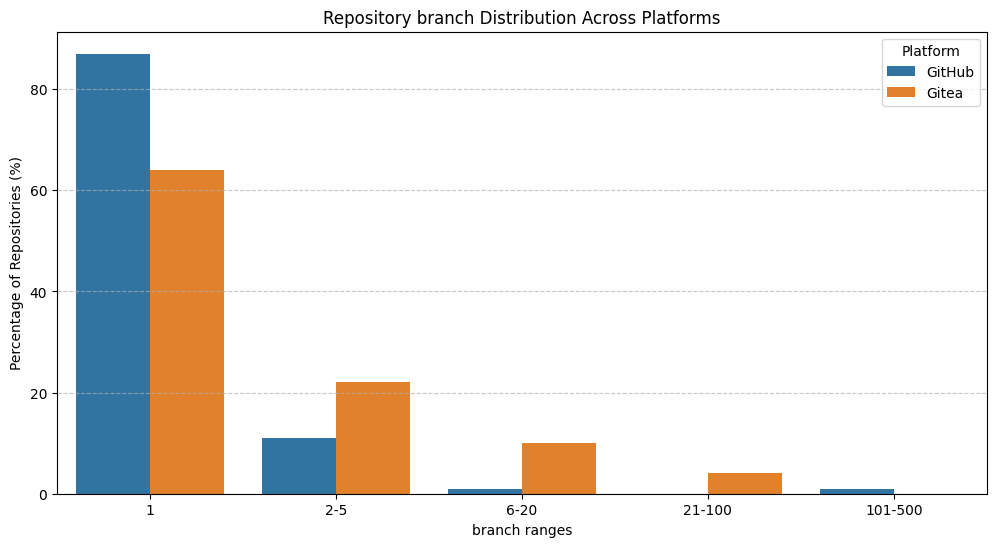

In [5]:
# Load Data
df_github = pd.read_csv("github_repos_with_metrics_test.csv")
df_gitea = pd.read_csv("gitea_repos_with_metrics_test.csv")

# Create the plot
platform_analysis.plot_distribution(df_github, df_gitea, Metrics.BRANCH)

Number of valid matches: 61


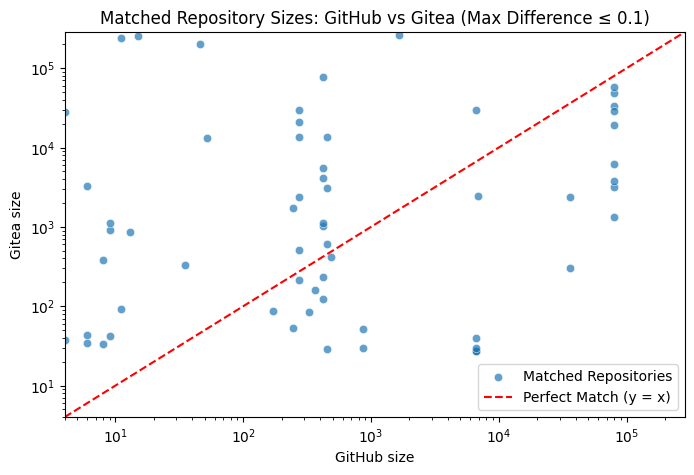

In [6]:
# Load Data
df_github = pd.read_csv("github_repos_with_metrics_test.csv")
df_gitea = pd.read_csv("gitea_repos_with_metrics_test.csv")

# Perform matching and create the plot
platform_analysis.propensity_score_matching(df_github, df_gitea, Metrics.SIZE, max_difference=0.1)

Number of valid matches: 70


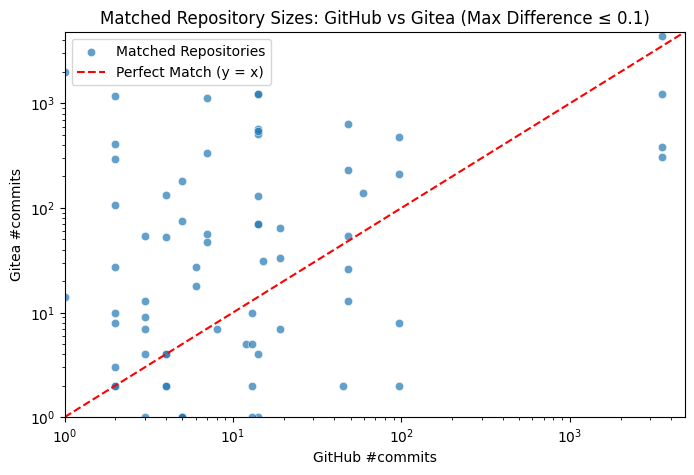

In [7]:
# Load Data
df_github = pd.read_csv("github_repos_with_metrics_test.csv")
df_gitea = pd.read_csv("gitea_repos_with_metrics_test.csv")

# Perform matching and create the plot
platform_analysis.propensity_score_matching(df_github, df_gitea, Metrics.COMMIT, max_difference=0.1)

Number of valid matches: 70


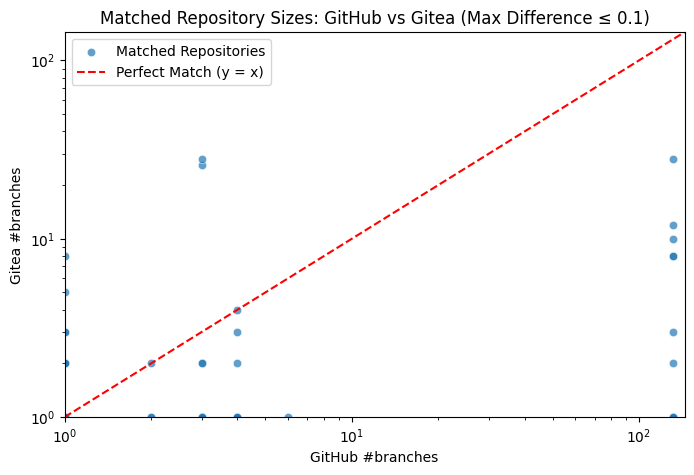

In [8]:
# Load Data
df_github = pd.read_csv("github_repos_with_metrics_test.csv")
df_gitea = pd.read_csv("gitea_repos_with_metrics_test.csv")

# Perform matching and create the plot
platform_analysis.propensity_score_matching(df_github, df_gitea, Metrics.BRANCH, max_difference=0.1)